Welcome to exercise one of “Apache Spark for Scalable Machine Learning on BigData”. In this exercise you’ll apply the basics of functional and parallel programming. 

Let’s start with a simple example. Let’s consider you have a list of integers.

Let’s find out what the size of this list is.

Note that we already provide an RDD object, so please have a look at the RDD API in order to find out what function to use:
https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD

The following link contains additional documentation:
https://spark.apache.org/docs/latest/rdd-programming-guide.html



# EXERCISE w1 - e1

In [1]:
!pip install --upgrade pip


     |████████████████████████████████| 1.4MB 15.7MB/s eta 0:00:01
  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1


In [2]:
!pip install pyspark

     |████████████████████████████████| 217.8 MB 10 kB/s s eta 0:00:01
     |████████████████████████████████| 197 kB 46.2 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257928 sha256=0d158f272dfa178c2f2993b56939397a4c9dd03dd251344592da53ada5ab943a
  Stored in directory: /home/dsxuser/.cache/pip/wheels/84/30/e3/c51c5cd0229631e662d29d7b578a3e5949a4c8db033ffb70aa
Successfully built pyspark


In [3]:
if not ('sc' in locals() or 'sc' in globals()):
    print('It seems you are note running in a IBM Watson Studio Apache Spark Notebook. You might be running in a IBM Watson Studio Default Runtime or outside IBM Waston Studio. Therefore installing local Apache Spark environment for you. Please do not use in Production')
    
#     from pip import main
#     main(['install', 'pyspark==2.4.5'])
    
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession

    sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
    
    spark = SparkSession \
        .builder \
        .getOrCreate()

It seems you are note running in a IBM Watson Studio Apache Spark Notebook. You might be running in a IBM Watson Studio Default Runtime or outside IBM Waston Studio. Therefore installing local Apache Spark environment for you. Please do not use in Production


In [4]:
gt50 = lambda i: i > 50

In [5]:
rdd = sc.parallelize(range(100))

In [6]:
# please replace $$ with the correct characters
rdd.count()

100

You should see "100" as answer. Now we want to know the sum of all elements. Please again, have a look at the API documentation and complete the code below in order to get the sum.

In [7]:
rdd.sum()

4950

# EXERCISE w1 - e2

In [8]:
from random import shuffle

In [9]:
rdd.filter(gt50).collect()

[51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [10]:
rdd.filter(lambda x : x > 50).collect()

[51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [11]:
rdd.filter(lambda x : x > 50).filter(lambda x: x < 75).collect()

[51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74]

# EXERCISE w1 - e3


In [12]:
from pyspark.sql import Row

#Create Dataframe
df = spark.createDataFrame([Row(id=1, value='value1'),Row(id=2, value='value2')])

#Print DataFrame
df.show()

#print the schema
df.printSchema()

+---+------+
| id| value|
+---+------+
|  1|value1|
|  2|value2|
+---+------+

root
 |-- id: long (nullable = true)
 |-- value: string (nullable = true)



In [13]:
df2 = spark.createDataFrame([Row(SNo=1,Name='Arun',GPA=8),Row(SNo=2,Name='Akash',GPA=9)])

df2.show()

+---+-----+---+
|GPA| Name|SNo|
+---+-----+---+
|  8| Arun|  1|
|  9|Akash|  2|
+---+-----+---+



In [14]:
#Create Sql table/view
df.createOrReplaceTempView('df_view')

#Execute SQL query
df_result = spark.sql('select * from df_view')

df_result.show()

+---+------+
| id| value|
+---+------+
|  1|value1|
|  2|value2|
+---+------+



In [15]:
# get result as string
df_result.first().value

'value1'

In [16]:
# get result as string
df_result.first().id

1

# Exercise w2 - e2
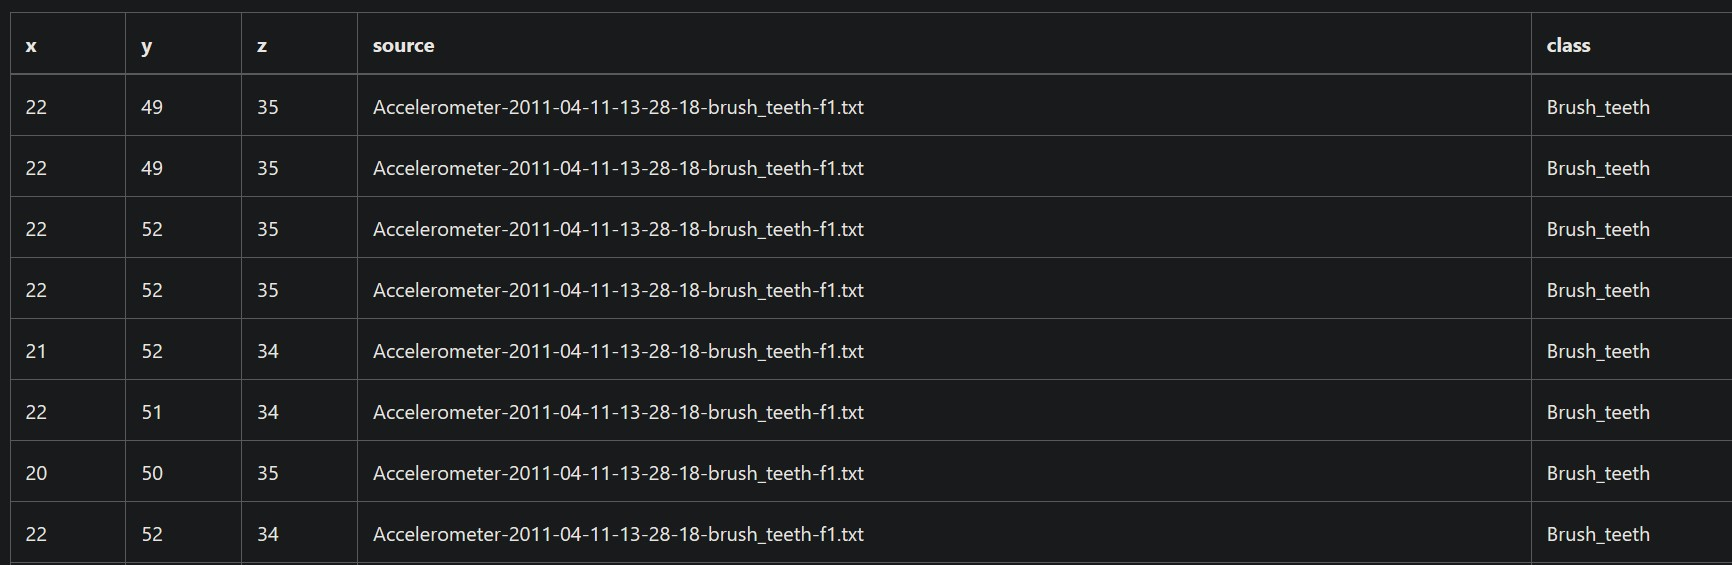

In [17]:
# delete files from previous runs
!rm -f hmp.parquet*

In [18]:

# download the file containing the data in PARQUET format
!wget https://github.com/IBM/coursera/raw/master/hmp.parquet
    
# create a dataframe out of it
df = spark.read.parquet('hmp.parquet')

# register a corresponding query table
df.createOrReplaceTempView('df')

--2020-04-21 08:12:20--  https://github.com/IBM/coursera/raw/master/hmp.parquet
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet [following]
--2020-04-21 08:12:20--  https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet [following]
--2020-04-21 08:12:21--  https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932997 (911K) [application/octet-stream]
Savin

In [19]:
df.show()
df.printSchema()

+---+---+---+--------------------+-----------+
|  x|  y|  z|              source|      class|
+---+---+---+--------------------+-----------+
| 22| 49| 35|Accelerometer-201...|Brush_teeth|
| 22| 49| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|
| 21| 52| 34|Accelerometer-201...|Brush_teeth|
| 22| 51| 34|Accelerometer-201...|Brush_teeth|
| 20| 50| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 34|Accelerometer-201...|Brush_teeth|
| 22| 50| 34|Accelerometer-201...|Brush_teeth|
| 22| 51| 35|Accelerometer-201...|Brush_teeth|
| 21| 51| 33|Accelerometer-201...|Brush_teeth|
| 20| 50| 34|Accelerometer-201...|Brush_teeth|
| 21| 49| 33|Accelerometer-201...|Brush_teeth|
| 21| 49| 33|Accelerometer-201...|Brush_teeth|
| 20| 51| 35|Accelerometer-201...|Brush_teeth|
| 18| 49| 34|Accelerometer-201...|Brush_teeth|
| 19| 48| 34|Accelerometer-201...|Brush_teeth|
| 16| 53| 34|Accelerometer-201...|Brush_teeth|
| 18| 52| 35|

It doesn’t matter if you express your queries with SQL or the DataFrame API – it all gets boiled down into the same execution plan optimized by Tungsten and accelerated by Catalyst. You can even mix and match SQL and DataFrame API code if you like.

In [20]:
spark.sql('select class,count(*) from df group by class').show()

+--------------+--------+
|         class|count(1)|
+--------------+--------+
| Use_telephone|   15225|
| Standup_chair|   25417|
|      Eat_meat|   31236|
|     Getup_bed|   45801|
|   Drink_glass|   42792|
|    Pour_water|   41673|
|     Comb_hair|   23504|
|          Walk|   92254|
|  Climb_stairs|   40258|
| Sitdown_chair|   25036|
|   Liedown_bed|   11446|
|Descend_stairs|   15375|
|   Brush_teeth|   29829|
|      Eat_soup|    6683|
+--------------+--------+



In [21]:
df.groupBy('class').count().show()

+--------------+-----+
|         class|count|
+--------------+-----+
| Use_telephone|15225|
| Standup_chair|25417|
|      Eat_meat|31236|
|     Getup_bed|45801|
|   Drink_glass|42792|
|    Pour_water|41673|
|     Comb_hair|23504|
|          Walk|92254|
|  Climb_stairs|40258|
| Sitdown_chair|25036|
|   Liedown_bed|11446|
|Descend_stairs|15375|
|   Brush_teeth|29829|
|      Eat_soup| 6683|
+--------------+-----+



In [22]:
!pip install --user --upgrade pixiedust

     |████████████████████████████████| 197 kB 15.0 MB/s eta 0:00:01
  Created wheel for pixiedust: filename=pixiedust-1.1.18-py3-none-any.whl size=321728 sha256=61463e069746d024af3f764a0f7f6a90541a542d4ff767752fd58939e76e0a7f
  Stored in directory: /home/dsxuser/.cache/pip/wheels/53/ef/c0/ea7927513033d0d23522c929df65b670b0433d46177c1bf70d
Successfully built pixiedust
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [23]:
from pyspark.sql.functions import col
counts = df.groupBy('class').count().orderBy('count')


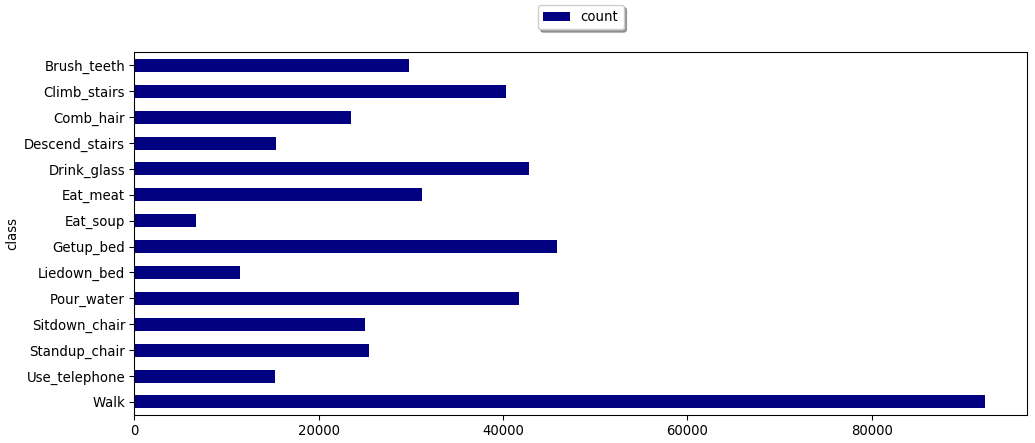

In [ ]:
import pixiedust
display(counts)

In [25]:
spark.sql('''
    
                    select
                        count(*) as ct -- count the number of rows per class and rename it to ct
                        from df -- access the temporary query table called df backed by DataFrame df
                        group by class -- aggrecate over class
              
''').show()

+-----+
|   ct|
+-----+
|15225|
|25417|
|31236|
|45801|
|42792|
|41673|
|23504|
|92254|
|40258|
|25036|
|11446|
|15375|
|29829|
| 6683|
+-----+



In [26]:
spark.sql('''
    
            select 
                min(ct) as min, -- compute minimum value of all classes
                max(ct) as max, -- compute maximum value of all classes
                mean(ct) as mean, -- compute mean between all classes
                stddev(ct) as stddev -- compute standard deviation between all classes
                from (
                    select
                        count(*) as ct -- count the number of rows per class and rename it to ct
                        from df -- access the temporary query table called df backed by DataFrame df
                        group by class -- aggrecate over class
                )  
''').show()

+----+-----+------------------+------------------+
| min|  max|              mean|            stddev|
+----+-----+------------------+------------------+
|6683|92254|31894.928571428572|21284.893716741157|
+----+-----+------------------+------------------+



In [27]:
spark.sql('''
    select 
        *,
        max/min as minmaxratio -- compute minmaxratio based on previously computed values
        from (
            select 
                min(ct) as min, -- compute minimum value of all classes
                max(ct) as max, -- compute maximum value of all classes
                mean(ct) as mean, -- compute mean between all classes
                stddev(ct) as stddev -- compute standard deviation between all classes
                from (
                    select
                        count(*) as ct -- count the number of rows per class and rename it to ct
                        from df -- access the temporary query table called df backed by DataFrame df
                        group by class -- aggrecate over class
                )
        )   
''').show()

+----+-----+------------------+------------------+-----------------+
| min|  max|              mean|            stddev|      minmaxratio|
+----+-----+------------------+------------------+-----------------+
|6683|92254|31894.928571428572|21284.893716741157|13.80427951518779|
+----+-----+------------------+------------------+-----------------+



Alternative Command

In [28]:
from pyspark.sql.functions import col, min, max, mean, stddev

df \
    .groupBy('class') \
    .count() \
    .select([ 
        min(col("count")).alias('min'), 
        max(col("count")).alias('max'), 
        mean(col("count")).alias('mean'), 
        stddev(col("count")).alias('stddev') 
    ]) \
    .select([
        col('*'),
        (col("max") / col("min")).alias('minmaxratio')
    ]) \
    .show()


+----+-----+------------------+------------------+-----------------+
| min|  max|              mean|            stddev|      minmaxratio|
+----+-----+------------------+------------------+-----------------+
|6683|92254|31894.928571428572|21284.893716741157|13.80427951518779|
+----+-----+------------------+------------------+-----------------+



Imbalanced classes can cause pain in machine learning. Therefore let’s rebalance. In the flowing we limit the number of elements per class to the amount of the least represented class. This is called undersampling. Other ways of rebalancing can be found here:

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

In [29]:
from pyspark.sql.functions import min

# create a lot of distinct classes from the dataset
classes = [row[0] for row in df.select('class').distinct().collect()]

# compute the number of elements of the smallest class in order to limit the number of samples per calss
min = df.groupBy('class').count().select(min('count')).first()[0]

# define the result dataframe variable
df_balanced = None

# iterate over distinct classes
for cls in classes:
    
    # only select examples for the specific class within this iteration
    # shuffle the order of the elements (by setting fraction to 1.0 sample works like shuffle)
    # return only the first n samples
    df_temp = df \
        .filter("class = '"+cls+"'") \
        .sample(False, 1.0) \
        .limit(min)
    
    # on first iteration, assing df_temp to empty df_balanced
    if df_balanced == None:    
        df_balanced = df_temp
    # afterwards, append vertically
    else:
        df_balanced=df_balanced.union(df_temp)

In [30]:
df_balanced.createOrReplaceTempView('df_balanced')
spark.sql('select class,count(*) as count from df_balanced group by class order by count').show()

+--------------+-----+
|         class|count|
+--------------+-----+
| Standup_chair| 6683|
|      Eat_meat| 6683|
| Use_telephone| 6683|
|   Drink_glass| 6683|
|     Getup_bed| 6683|
|    Pour_water| 6683|
|     Comb_hair| 6683|
|          Walk| 6683|
|  Climb_stairs| 6683|
| Sitdown_chair| 6683|
|   Liedown_bed| 6683|
|Descend_stairs| 6683|
|   Brush_teeth| 6683|
|      Eat_soup| 6683|
+--------------+-----+



In [31]:
df_balanced.groupby('class').count().show()

+--------------+-----+
|         class|count|
+--------------+-----+
| Use_telephone| 6683|
| Standup_chair| 6683|
|      Eat_meat| 6683|
|     Getup_bed| 6683|
|   Drink_glass| 6683|
|    Pour_water| 6683|
|     Comb_hair| 6683|
|          Walk| 6683|
|  Climb_stairs| 6683|
| Sitdown_chair| 6683|
|   Liedown_bed| 6683|
|Descend_stairs| 6683|
|   Brush_teeth| 6683|
|      Eat_soup| 6683|
+--------------+-----+



# Exercise w2 - e2

In [32]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2020-04-21 08:13:06--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2020-04-21 08:13:06--  https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet [following]
--2020-04-21 08:13:06--  https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/coursera_ds/washing.parquet [fo

In [33]:
df = spark.read.parquet('washing.parquet')
df.count()

2058

In [34]:
df.createOrReplaceTempView("washing")
spark.sql("SELECT * FROM washing").show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [35]:
result = spark.sql("select voltage from washing where voltage is not null")
result_array = result.rdd.map(lambda row : row.voltage).sample(False,0.1).collect()

#just print the 1st 15 elements
result_array[:15]

[228, 233, 238, 232, 236, 230, 248, 235, 231, 237, 237, 231, 225, 236, 227]

In [36]:
%matplotlib inline

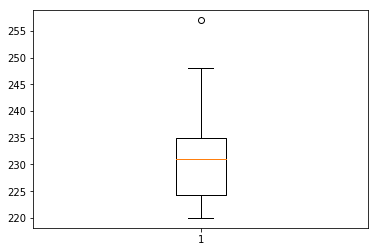

In [37]:
import matplotlib.pyplot as plt
plt.boxplot(result_array)
plt.show()

In [38]:
result = spark.sql("select voltage,ts from washing where voltage is not null order by ts asc")
result_rdd = result.rdd.sample(False,0.1).map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
print(result_array_ts[:15])
print(result_array_voltage[:15])

[1547808731918, 1547808761934, 1547808770939, 1547808800960, 1547808833983, 1547808855034, 1547808891076, 1547808921096, 1547808933120, 1547808990168, 1547809002173, 1547809005175, 1547809038211, 1547809077231, 1547809149271]
[236, 230, 239, 226, 222, 221, 220, 224, 228, 232, 243, 252, 239, 220, 232]


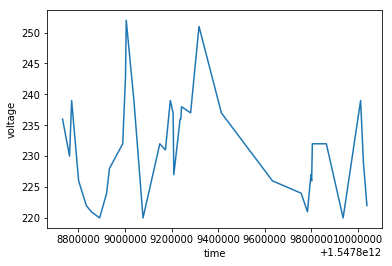

In [39]:
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

+-------------+-------------+
|      min(ts)|      max(ts)|
+-------------+-------------+
|1547808720911|1547810064867|
+-------------+-------------+



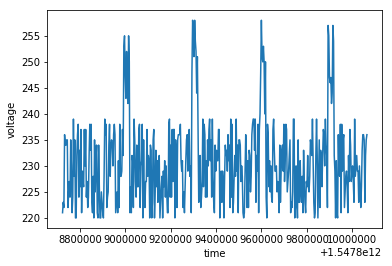

In [40]:
spark.sql("select min(ts),max(ts) from washing").show()

result = spark.sql(
"""
select voltage,ts from washing 
    where voltage is not null and 
    ts > 1547808720911 and
    ts <= 1547810064867+3600000
    order by ts asc
""")
result_rdd = result.rdd.map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [41]:
result_df = spark.sql("""
select hardness,temperature,flowrate from washing
    where hardness is not null and 
    temperature is not null and 
    flowrate is not null
""")
result_rdd = result_df.rdd.sample(False,0.1).map(lambda row : (row.hardness,row.temperature,row.flowrate))
result_array_hardness = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[0]).collect()
result_array_temperature = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[1]).collect()
result_array_flowrate = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[2]).collect()



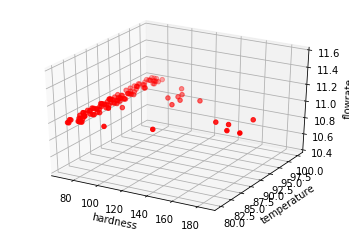

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_array_hardness,result_array_temperature,result_array_flowrate, c='r', marker='o')

ax.set_xlabel('hardness')
ax.set_ylabel('temperature')
ax.set_zlabel('flowrate')

plt.show()

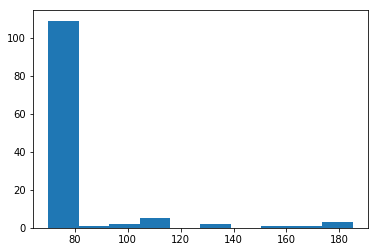

In [43]:
plt.hist(result_array_hardness)
plt.show()

# EXERCISE w2 - e3 (PCA)

In [44]:
result = spark.sql("""
SELECT * from (
    SELECT
    min(temperature) over w as min_temperature,
    max(temperature) over w as max_temperature, 
    min(voltage) over w as min_voltage,
    max(voltage) over w as max_voltage,
    min(flowrate) over w as min_flowrate,
    max(flowrate) over w as max_flowrate,
    min(frequency) over w as min_frequency,
    max(frequency) over w as max_frequency,
    min(hardness) over w as min_hardness,
    max(hardness) over w as max_hardness,
    min(speed) over w as min_speed,
    max(speed) over w as max_speed
    FROM washing 
    WINDOW w AS (ORDER BY ts ROWS BETWEEN CURRENT ROW AND 10 FOLLOWING) 
)
WHERE min_temperature is not null 
AND max_temperature is not null
AND min_voltage is not null
AND max_voltage is not null
AND min_flowrate is not null
AND max_flowrate is not null
AND min_frequency is not null
AND max_frequency is not null
AND min_hardness is not null
AND min_speed is not null
AND max_speed is not null   
""")

In [45]:
#Since this table contains null values also our window might contain them. In case for a certain feature all values in that window are null we obtain also null. As we can see here (in my dataset) this is the case for 9 rows.

df.count()-result.count()

7

In [46]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

#Let's define a vector transformation helper class which takes all our input features (result.columns) and created one additional column called "features" which contains all our input features as one single column wrapped in "DenseVector" objects
assembler = VectorAssembler(inputCols=result.columns, outputCol="features")

#Now we actually transform the data, note that this is highly optimized code and runs really fast in contrast if we had implemented it.
features = assembler.transform(result)

features.rdd.map(lambda r : r.features).take(10)

[DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 71.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 80.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 72.0, 80.0, 1033.0, 1046.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0])]

In [47]:
pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(features)

In [48]:
result_pca = model.transform(features).select("pcaFeatures")
result_pca.show(truncate=False)

+-----------------------------------------------------------+
|pcaFeatures                                                |
+-----------------------------------------------------------+
|[1459.9789705814187,-18.745237781780922,70.78430794796873] |
|[1459.995481828676,-19.11343146165273,70.72738871425986]   |
|[1460.0895843561282,-20.969471062922928,70.75630600322052] |
|[1469.6993929419532,-20.403124647615513,62.013569674880955]|
|[1469.7159041892107,-20.771318327487293,61.95665044117209] |
|[1469.7128317338704,-20.790751117222456,61.896106678330966]|
|[1478.3530264572928,-20.294557029728722,71.67550104809607] |
|[1478.3530264572928,-20.294557029728722,71.67550104809607] |
|[1478.3686036138165,-20.260626897636314,71.63355353606426] |
|[1478.3686036138165,-20.260626897636314,71.63355353606426] |
|[1483.5412027684088,-20.006222577501354,66.82710394284209] |
|[1483.5171090223353,-20.867020421583753,66.86707301954084] |
|[1483.4224268542928,-19.87574823665505,66.93027077913985]  |
|[1483.4

In [49]:
result_pca.count()

2051

In [50]:
rdd = result_pca.rdd.sample(False,0.8)

In [51]:
rdd.count()

1626

In [52]:
x = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[0]).collect()
y = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[1]).collect()
z = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[2]).collect()

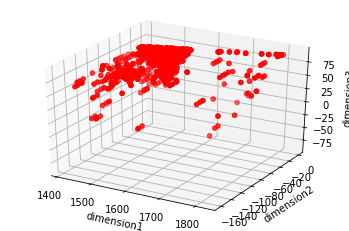

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')




ax.scatter(x,y,z, c='r', marker='o')

ax.set_xlabel('dimension1')
ax.set_ylabel('dimension2')
ax.set_zlabel('dimension3')

plt.show()

# EXERCISE-w3-e2

In [54]:
# delete files from previous runs
!rm -f hmp.parquet*

# download the file containing the data in PARQUET format
!wget https://github.com/IBM/coursera/raw/master/hmp.parquet
    
# create a dataframe out of it
df = spark.read.parquet('hmp.parquet')

# register a corresponding query table
df.createOrReplaceTempView('df')

--2020-04-21 10:07:56--  https://github.com/IBM/coursera/raw/master/hmp.parquet
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet [following]
--2020-04-21 10:07:56--  https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet [following]
--2020-04-21 10:07:57--  https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932997 (911K) [application/octet-stream]
Savin

In [55]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, Normalizer
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline

indexer = StringIndexer(inputCol="class", outputCol="classIndex")
encoder = OneHotEncoder(inputCol="classIndex", outputCol="categoryVec")
vectorAssembler = VectorAssembler(inputCols=["x","y","z"],
                                  outputCol="features")
normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)

pipeline = Pipeline(stages=[indexer, encoder, vectorAssembler, normalizer])
model = pipeline.fit(df)
prediction = model.transform(df)
prediction.show()

+---+---+---+--------------------+-----------+----------+--------------+----------------+--------------------+
|  x|  y|  z|              source|      class|classIndex|   categoryVec|        features|       features_norm|
+---+---+---+--------------------+-----------+----------+--------------+----------------+--------------------+
| 22| 49| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,49.0,35.0]|[0.20754716981132...|
| 22| 49| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,49.0,35.0]|[0.20754716981132...|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,52.0,35.0]|[0.20183486238532...|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,52.0,35.0]|[0.20183486238532...|
| 21| 52| 34|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[21.0,52.0,34.0]|[0.19626168224299...|
| 22| 51| 34|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,51.0,34.0]|[0.20560747663551...|
|

In [56]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans(featuresCol="features").setK(14).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler, kmeans])
model = pipeline.fit(df)
predictions = model.transform(df)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.41244594513295846


In [ ]:
# please change the pipeline the check performance for different K, feel free to use a loop
for  x in range(2,20):
    kmeans = KMeans(featuresCol="features").setK(x).setSeed(1)
    pipeline = Pipeline(stages=[vectorAssembler, kmeans])
    model = pipeline.fit(df)

    predictions = model.transform(df)

    evaluator = ClusteringEvaluator()

    silhouette = evaluator.evaluate(predictions)
    print("Silhouette with squared euclidean distance for k = %2d, is : %1.4f"%(x,silhouette))


In [57]:
#normalized features
kmeans = KMeans(featuresCol="features_norm").setK(2).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler,normalizer, kmeans])
model = pipeline.fit(df)

predictions = model.transform(df)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))


Silhouette with squared euclidean distance = 0.6462988404434188


In [58]:
from pyspark.sql.functions import col
df_denormalized = df.select([col('*'),(col('x')*10)]).drop('x').withColumnRenamed('(x * 10)','x')

In [59]:
kmeans = KMeans(featuresCol="features").setK(14).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler, kmeans])
model = pipeline.fit(df_denormalized)
predictions = model.transform(df_denormalized)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.5709023393004293


In [60]:
from pyspark.ml.clustering import GaussianMixture

gmm = GaussianMixture().setK(2).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler,normalizer,gmm])

model = pipeline.fit(df)

predictions = model.transform(df)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.3528427198750997


# EXERCISE-w4-e2

In [61]:
splits = df.randomSplit([0.8, 0.2])
df_train = splits[0]
df_test = splits[1]

In [62]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import Normalizer


indexer = StringIndexer(inputCol="class", outputCol="label")

vectorAssembler = VectorAssembler(inputCols=["x","y","z"],
                                  outputCol="features")

normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
pipeline = Pipeline(stages=[indexer, vectorAssembler, normalizer,lr])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)

In [ ]:
prediction.printSchema()

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
MulticlassClassificationEvaluator().setMetricName("accuracy").evaluate(prediction) 